In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd  
%matplotlib inline
import plotly.express as px
import imblearn
#import sklearn module
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)


In [2]:
df=pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Input features:distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order

Output feature:Fraud

● distance_from_home - The distance from home where the transaction happened.

● distance_from_last_transaction - The distance from the last transaction 
happened.

● ratio_to_median_purchase_price - Ratio of purchased price transaction to 
median purchase price.

● repeat_retailer - Whether the transaction happened from the same retailer.

● used_chip - Whether the transaction through chip (credit card).

● used_pin_number - Whether the transaction happened by using PIN number.

● online_order - Whether the transaction is an online order.

● fraud - Whether the transaction fraudulent

In [3]:
df.shape

(1000000, 8)

# Data Exploration :

In [4]:
numeric_var=df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]
numeric_var

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940
1,10.829943,0.175592,1.294219
2,5.091079,0.805153,0.427715
3,2.247564,5.600044,0.362663
4,44.190936,0.566486,2.222767
...,...,...,...
999995,2.207101,0.112651,1.626798
999996,19.872726,2.683904,2.778303
999997,2.914857,1.472687,0.218075
999998,4.258729,0.242023,0.475822


In [5]:
quali_var=df[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']]
quali_var

,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
999995,1.0,1.0,0.0,0.0,0.0
999996,1.0,1.0,0.0,0.0,0.0
999997,1.0,1.0,0.0,1.0,0.0
999998,1.0,0.0,0.0,1.0,0.0


In [6]:
numeric_var.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


In [7]:
print(quali_var['repeat_retailer'].value_counts())
print(quali_var['used_chip'].value_counts())
print(quali_var['used_pin_number'].value_counts())
print(quali_var['online_order'].value_counts())
print(quali_var['fraud'].value_counts())

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64
0.0    649601
1.0    350399
Name: used_chip, dtype: int64
0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64
1.0    650552
0.0    349448
Name: online_order, dtype: int64
0.0    912597
1.0     87403
Name: fraud, dtype: int64


We can find that there are 5 categorical variables, all of which are dummy variables

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

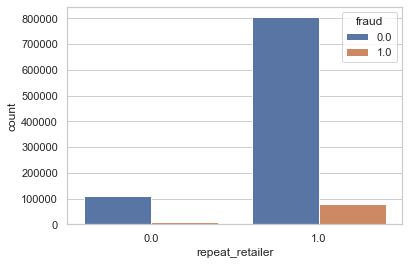

In [8]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df.repeat_retailer,data=df, hue=df.fraud)
df.repeat_retailer.value_counts()

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

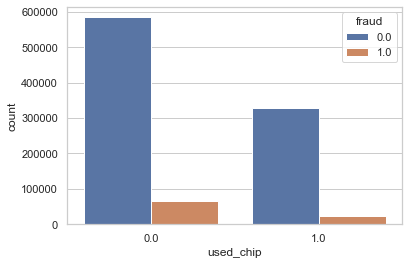

In [9]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df.used_chip,data=df, hue=df.fraud)
df.used_chip.value_counts()

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

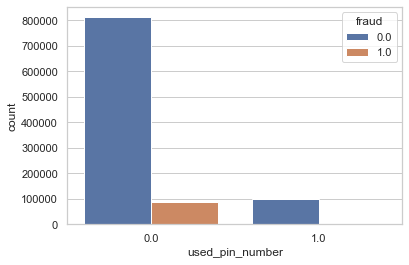

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df.used_pin_number,data=df, hue=df.fraud)
df.used_pin_number.value_counts()

1.0    650552
0.0    349448
Name: online_order, dtype: int64

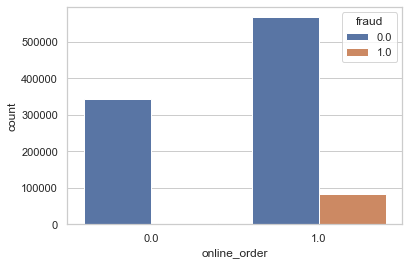

In [11]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df.online_order,data=df, hue=df.fraud)
df.online_order.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

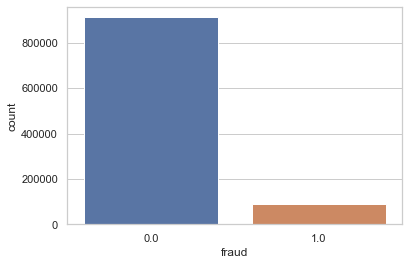

In [12]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df.fraud,data=df)
df.fraud.value_counts()

We can find that there are 3 numeric variables

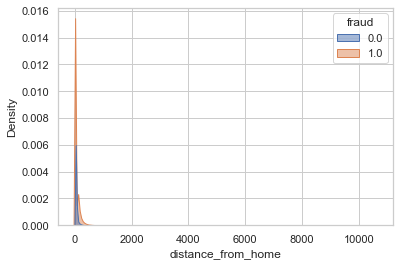

In [13]:
sns.kdeplot(data=df, x="distance_from_home", hue="fraud", fill=True, common_norm=False, alpha=0.5)
plt.show()

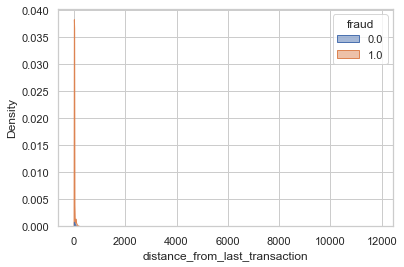

In [14]:
sns.kdeplot(data=df, x="distance_from_last_transaction", hue="fraud", fill=True, common_norm=False, alpha=0.5)
plt.show()

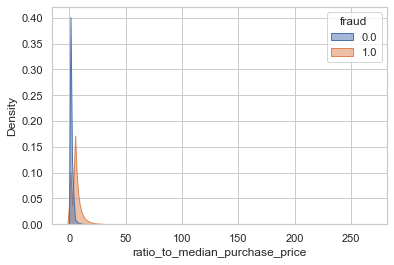

In [15]:
sns.kdeplot(data=df, x="ratio_to_median_purchase_price", hue="fraud", fill=True, common_norm=False, alpha=0.5)
plt.show()

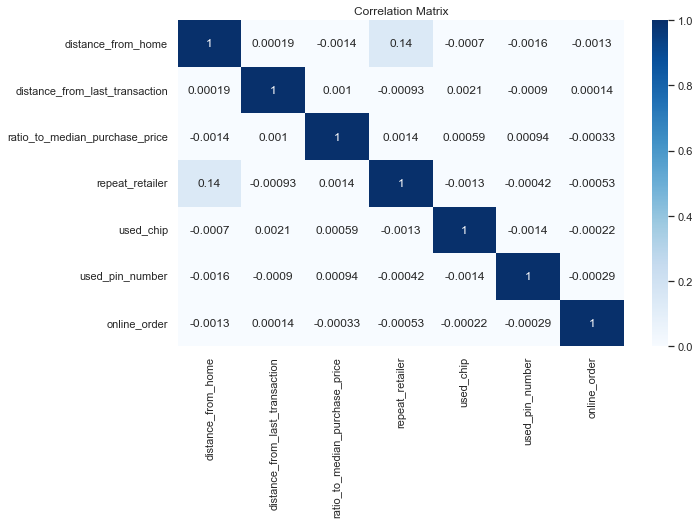

In [16]:
df_2 = df.drop(columns=['fraud'])
corr = df_2.corr()
plt.figure(figsize=(10,6))
plt.title('Correlation Matrix')
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "Blues");

# Feature Engineering

In [17]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [18]:
#clean the outlier
df2=['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

<AxesSubplot:>

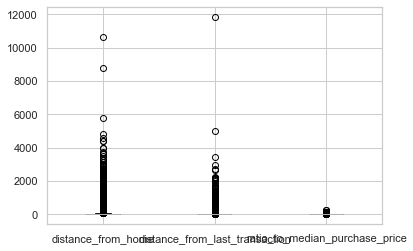

In [19]:
df.boxplot(df2)

In [20]:
for x in ['distance_from_home']:
    q2,q1 = np.percentile(df.loc[:,x],[99.85,0.15])
 
    df.loc[df[x] < q1,x] = np.nan
    df.loc[df[x] > q2,x] = np.nan

for x in ['distance_from_last_transaction']:
    q2,q1 = np.percentile(df.loc[:,x],[99.85,0.15])

    max = q2
    min = q1
 
    df.loc[df[x] < q1,x] = np.nan
    df.loc[df[x] > q2,x] = np.nan

for x in ['ratio_to_median_purchase_price']:
    q2,q1 = np.percentile(df.loc[:,x],[99.85,0.15])
 
    df.loc[df[x] < q1,x] = np.nan
    df.loc[df[x] > q2,x] = np.nan

In [22]:
df.isnull().sum()

distance_from_home                3000
distance_from_last_transaction    3000
ratio_to_median_purchase_price    3000
repeat_retailer                      0
used_chip                            0
used_pin_number                      0
online_order                         0
fraud                                0
dtype: int64

In [23]:
df_clear = df.dropna(axis = 0)

In [24]:
df_clear

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [25]:
df_clear.fraud.value_counts()

0.0    906224
1.0     84808
Name: fraud, dtype: int64

# Train test split

In [26]:
from sklearn.model_selection import train_test_split
X = df_clear.drop('fraud',axis = 1)
y = df_clear.fraud
X_train_im,X_test_im,y_train_im,y_test_im = train_test_split(X,y,test_size = 0.2 , random_state = 1)



In [27]:
df_subset=df_clear.sample(frac=0.1,random_state=42)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99103 entries, 359893 to 96812
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              99103 non-null  float64
 1   distance_from_last_transaction  99103 non-null  float64
 2   ratio_to_median_purchase_price  99103 non-null  float64
 3   repeat_retailer                 99103 non-null  float64
 4   used_chip                       99103 non-null  float64
 5   used_pin_number                 99103 non-null  float64
 6   online_order                    99103 non-null  float64
 7   fraud                           99103 non-null  float64
dtypes: float64(8)
memory usage: 6.8 MB


In [28]:
df_subset['fraud'].value_counts()

0.0    90548
1.0     8555
Name: fraud, dtype: int64

In [29]:
X1 = df_subset.drop('fraud',axis = 1)
y1 = df_subset.fraud
X1_train_im,X1_test_im,y1_train_im,y1_test_im = train_test_split(X1,y1,test_size = 0.2 , random_state = 1)


# Model

In [30]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [31]:
from imblearn.pipeline import make_pipeline

In [32]:
# Construct some pipelines: we create different piplines for different models 

pipe1_im = make_pipeline(MinMaxScaler(),SMOTE(),LogisticRegression(random_state=99))
print(pipe1_im)

pipe2_im = make_pipeline(MinMaxScaler(),SMOTE(),DecisionTreeClassifier(random_state=21))
print(pipe2_im)

pipe3_im = make_pipeline(MinMaxScaler(),SMOTE(),RandomForestClassifier(random_state=45))
print(pipe3_im)

pipe4_im = make_pipeline(MinMaxScaler(),SMOTE(),SVC(random_state=60))

print(pipe4_im)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(random_state=99))])
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('smote', SMOTE()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=21))])
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=45))])
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('smote', SMOTE()),
                ('svc', SVC(random_state=60))])


In [36]:
# defining the params for hyper-parameters
params_dc = dict(decisiontreeclassifier__criterion=['gini', 'entropy'],
                 decisiontreeclassifier__max_depth=[2, 4, 6, 8, 10],
                decisiontreeclassifier__min_samples_leaf=[3,5,7,9])

params_rf = dict(randomforestclassifier__n_estimators=[int(x) for x in np.linspace(start =50, stop=300,num=50)],
              randomforestclassifier__max_depth=[2,5,10],
               randomforestclassifier__max_features = ['auto','sqrt'],
               randomforestclassifier__min_samples_split = [2,5,10])
#params_rf = dict(randomforestclassifier__n_estimators=[20,50],
             #randomforestclassifier__max_depth=[2,5,10],
           #randomforestclassifier__max_features = ['auto'],
            #    randomforestclassifier__min_samples_split = [2,5,10])           
params_svc = dict(svc__C = [0.1,1,5,10],
              svc__kernel = ['linear','rbf'])

In [34]:
# Fit the pipelines

#Grid Search CV - DC
gcv_dc_im=GridSearchCV(pipe2_im,param_grid=params_dc,n_jobs=-1).fit(X_train_im,y_train_im)
print(gcv_dc_im.best_params_)
print(pd.DataFrame(gcv_dc_im.cv_results_))


{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_leaf': 5}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       25.053858      1.604874         0.246137        0.020839   
1       24.407622      2.260472         0.425476        0.459489   
2       26.658461      6.569653         0.339326        0.215159   
3       33.340237      6.092589         0.664173        0.675074   
4       37.590635      2.197137         0.516623        0.082521   
5       39.916580      1.685796         0.366632        0.073741   
6       21.438896      9.678431         0.724842        0.641457   
7       14.260175      1.201924         0.321563        0.140802   
8       19.664588      5.388769         0.493970        0.158179   
9       25.516766      0.428322         0.488619        0.055787   
10      23.889753      1.705454         0.472471        0.068228   
11      23.035721      1.627125         0.461085

In [38]:
#Grid Search CV - RF
gcv_rf_im=GridSearchCV(pipe3_im,param_grid=params_rf,n_jobs=-1).fit(X_train_im,y_train_im)
print(gcv_rf_im.best_params_)
print(pd.DataFrame(gcv_rf_im.cv_results_))
#Grid Search CV - SVC
gcv_svc_im=GridSearchCV(pipe4_im,param_grid=params_svc,n_jobs=-1).fit(X1_train_im,y1_train_im)
print(gcv_svc_im.best_params_)
print(pd.DataFrame(gcv_svc_im.cv_results_))

{'svc__C': 10, 'svc__kernel': 'rbf'}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
0    2116.271524     16.312904         7.984255        0.194865          0.1   
1    2126.092436     12.990553        13.133280        0.251677          0.1   
2    2076.250350     44.301439         6.983631        0.775699            1   
3    2098.795495     60.798415         8.793655        1.458397            1   
4    1962.265464    226.971152         8.046866        1.272333            5   
5    1074.041075    480.247598         7.313332        0.488052            5   
6     913.012820    936.089762         7.888724        1.042500           10   
7     595.874221    400.086227         6.635542        1.235001           10   

  param_svc__kernel                                    params  \
0            linear  {'svc__C': 0.1, 'svc__kernel': 'linear'}   
1               rbf     {'svc__C': 0.1, 'svc__kernel': 'rbf'}   
2            linear    {'svc__C': 1, 'svc__kern

In [40]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_val_score

In [41]:
pipeline_logim = imbpipeline(steps = [['minmaxscaler', MinMaxScaler()],
                                ['smote', SMOTE(random_state=11)],
                                ['classifier', LogisticRegression(random_state=99)]])
LOG_best_im = cross_val_score(estimator=pipeline_logim, X=X_train_im, y=y_train_im, cv=5)
print('LOG', round(LOG_best_im.mean(),3), round(LOG_best_im.std(),4))

LOG 0.936 0.0002


In [42]:
print(LOG_best_im)

[0.93648661 0.93634156 0.93632895 0.9359001  0.93617759]


In [83]:
pipeline_dcim = imbpipeline(steps = [['minmaxscaler', MinMaxScaler()],
                                ['smote', SMOTE(random_state=11)],
                                ['classifier', DecisionTreeClassifier(random_state=21,max_depth=8,min_samples_leaf=5,criterion='entropy')]])

DC_best_im = cross_val_score(estimator=pipeline_dcim, X=X_train_im, y=y_train_im, cv=5)
print('DC', round(DC_best_im.mean(),3), round(DC_best_im.std(),4))

DC 1.0 0.0


In [99]:
print(DC_best_im)
print('DC',DC_best_im.mean(), round(DC_best_im.std(),5))

[0.99998108 0.99996847 0.99991171 0.99994324 0.99994955]
DC 0.9999508088165736 2e-05


In [45]:
pipeline_rfim = imbpipeline(steps = [['minmaxscaler', MinMaxScaler()],
                               ['smote', SMOTE(random_state=11)],
                              ['classifier', RandomForestClassifier(random_state=45,n_estimators=100,max_depth=10,
                                                                    max_features = 'auto',min_samples_split=2)]])
RF_best_im = cross_val_score(estimator=pipeline_rfim, X=X_train_im, y=y_train_im, cv=5)
print('RF', round(RF_best_im.mean().mean(),3),round(RF_best_im.std(),4))


RF 1.0 0.0


In [101]:
print('RF', RF_best_im.mean(),round(RF_best_im.std(),5))
print(RF_best_im)

RF 0.9999836029388579 1e-05
[0.99998739 0.99998739 0.99997477 0.99999369 0.99997477]


In [46]:
pipeline_svmim = imbpipeline(steps = [['minmaxscaler', MinMaxScaler()],
                               ['smote', SMOTE(random_state=11)],
                              ['classifier', SVC(random_state=60,C=10,kernel="rbf")]])
SVC_best_im  =cross_val_score(pipeline_svmim, X=X1_train_im, y=y1_train_im, cv=5)
print('SVC', round(SVC_best_im.mean(),3), round(SVC_best_im.std(),4))

SVC 0.977 0.0012


In [85]:
print(SVC_best_im)

[0.97723403 0.97666646 0.97710646 0.9797553  0.97666498]


In [33]:
from sklearn.model_selection import cross_val_score
#LOG_best_im = cross_val_score(estimator=pipeline_logim, X=X_train_im, y=y_train_im, cv=5)
#DC_best_im = cross_val_score(estimator=pipeline_dcim, X=X_train_im, y=y_train_im, cv=5)
#RF_best_im = cross_val_score(estimator=pipeline_rfim, X=X_train_im, y=y_train_im, cv=5)
#SVC_best_im  =cross_val_score(pipeline_svmim, X=X_train_im, y=y_train_im, cv=5)

In [34]:
#print('LOG', round(LOG_best_im.mean(),3), round(LOG_best_im.std(),4))
#print('DC', round(DC_best_im.mean(),3), round(DC_best_im.std(),4))
#print('RF', round(RF_best_im.mean().mean(),3),round(RF_best_im.std(),4))
#print('SVC', round(SVC_best_im.mean(),3), round(SVC_best_im.std(),4))

DC 1.0 0.0


In [51]:
from imblearn.over_sampling import SMOTE
over_samplers =SMOTE()
X_smote,y_smote = over_samplers.fit_resample(X_train_im,y_train_im)
y_smote =pd.Series(y_smote)
print(y_smote.value_counts())
print(X_smote.shape,y_smote.shape)


0.0    725124
1.0    725124
Name: fraud, dtype: int64
(1450248, 7) (1450248,)


In [57]:
df_smote = pd.concat([pd.DataFrame(X_smote) , pd.DataFrame(y_smote)] , axis = 1)

0.0    725124
1.0    725124
Name: fraud, dtype: int64

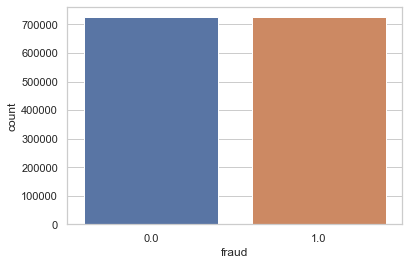

In [58]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df_smote.fraud,data=df_smote)
df_smote.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

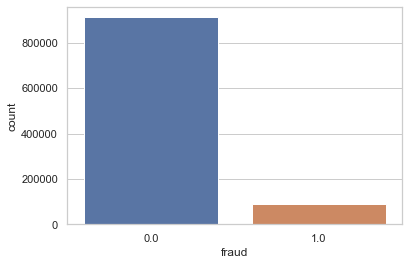

In [59]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df.fraud,data=df)
df.fraud.value_counts()

In [52]:
X1_smote,y1_smote = over_samplers.fit_resample(X1_train_im,y1_train_im)
y1_smote =pd.Series(y1_smote)
print(y1_smote.value_counts())
print(X1_smote.shape,y1_smote.shape)

0.0    72453
1.0    72453
Name: fraud, dtype: int64
(144906, 7) (144906,)


In [53]:
SVC_im_final = SVC(random_state=60,C=10,kernel="rbf",probability=True).fit(X1_smote, y1_smote)
LOG_im_final = LogisticRegression(random_state=99).fit(X_smote, y_smote)
DC_im_final = DecisionTreeClassifier(random_state=21,max_depth=8,min_samples_leaf=5,criterion='entropy').fit(X_smote, y_smote)
RF_im_final = RandomForestClassifier(random_state=45,n_estimators=100,max_depth=10,
                max_features = 'auto',min_samples_split=2).fit(X_smote, y_smote)

/opt/network/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#logistic
y_test_predict_log_im=LOG_im_final.predict(X_test_im)
cm_log_im = confusion_matrix(y_test_im, y_test_predict_log_im)
cm_log_im

array([[169651,  11449],
       [   766,  16341]])

In [63]:
print("accuracy:",accuracy_score(y_test_im, y_test_predict_log_im),
      "precision:",precision_score(y_test_im, y_test_predict_log_im),
     "recall:",recall_score(y_test_im, y_test_predict_log_im),
     "F1_score:",f1_score(y_test_im, y_test_predict_log_im))

accuracy: 0.9383725095480987 precision: 0.5880172724001439 recall: 0.9552230081253288 F1_score: 0.7279328240194223


AUC=0.981


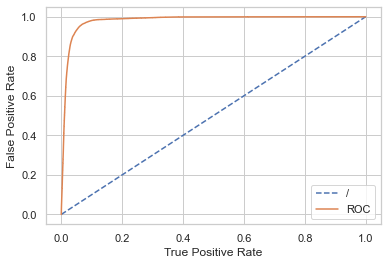

In [64]:
# Compute ROC curve and AUC
y_pred_proba = LOG_im_final.predict_proba(X_test_im)[::,1]
ns_probs = [0 for _ in range(len(y_test_im))]

#
ns_auc = roc_auc_score(y_test_im, ns_probs)
lr_auc = roc_auc_score(y_test_im, y_pred_proba)
ns_fpr, ns_tpr, _ = roc_curve(y_test_im, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_im, y_pred_proba)

print('AUC=%.3f' % (lr_auc))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='/')
plt.plot(lr_fpr, lr_tpr, label='ROC')

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [65]:
#decision tree
y_test_predict_dc_im=DC_im_final.predict(X_test_im)
cm_dc_im = confusion_matrix(y_test_im, y_test_predict_dc_im)
cm_dc_im

array([[181098,      2],
       [    10,  17097]])

In [66]:
print("accuracy:",accuracy_score(y_test_im, y_test_predict_dc_im),
      "precision:",precision_score(y_test_im, y_test_predict_dc_im),
     "recall:",recall_score(y_test_im, y_test_predict_dc_im),
     "F1_score:",f1_score(y_test_im, y_test_predict_dc_im))

accuracy: 0.9999394572341037 precision: 0.9998830340955611 recall: 0.9994154439703046 F1_score: 0.9996491843536223


In [123]:
#feature importance
import pandas as pd
importances = pd.DataFrame({'feature':X_train_im.columns,'importance':np.round(DC_im_final.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
2,ratio_to_median_purchase_price,0.435
0,distance_from_home,0.248
1,distance_from_last_transaction,0.144
6,online_order,0.085
5,used_pin_number,0.040
4,used_chip,0.034
3,repeat_retailer,0.013


AUC=1.000


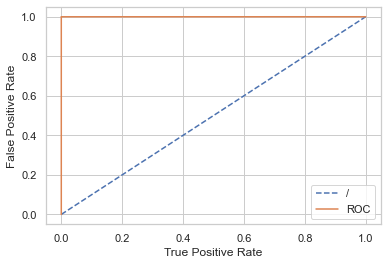

In [79]:
# Compute ROC curve and ROC area for each class
y_pred_proba1 = DC_im_final.predict_proba(X_test_im)[::,1]
ns_probs1 = [0 for _ in range(len(y_test_im))]

#
ns_auc1 = roc_auc_score(y_test_im, ns_probs1)
lr_auc1 = roc_auc_score(y_test_im, y_pred_proba1)
ns_fpr1, ns_tpr1, _ = roc_curve(y_test_im, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test_im, y_pred_proba1)

print('AUC=%.3f' % (lr_auc1))

plt.plot(ns_fpr1, ns_tpr1, linestyle='--', label='/')
plt.plot(lr_fpr1, lr_tpr1, label='ROC')

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [69]:
#random forest
y_test_predict_rf_im=RF_im_final.predict(X_test_im)
cm_rf_im = confusion_matrix(y_test_im, y_test_predict_rf_im)
cm_rf_im

array([[181100,      0],
       [     2,  17105]])

In [70]:
print("accuracy:",accuracy_score(y_test_im, y_test_predict_rf_im),
      "precision:",precision_score(y_test_im, y_test_predict_rf_im),
     "recall:",recall_score(y_test_im, y_test_predict_rf_im),
     "F1_score:",f1_score(y_test_im, y_test_predict_rf_im))

accuracy: 0.9999899095390173 precision: 1.0 recall: 0.999883088794061 F1_score: 0.9999415409797732


In [124]:
#feature importance
importances = pd.DataFrame({'feature':X_train_im.columns,'importance':np.round(RF_im_final.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
2,ratio_to_median_purchase_price,0.550
0,distance_from_home,0.200
6,online_order,0.114
1,distance_from_last_transaction,0.063
5,used_pin_number,0.037
4,used_chip,0.030
3,repeat_retailer,0.008


AUC=0.981


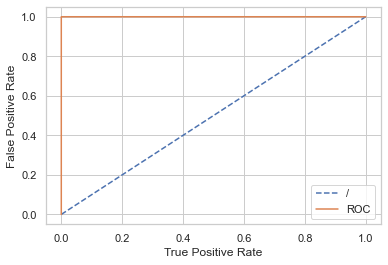

In [72]:
# Compute ROC curve and ROC area for each class
y_pred_proba2 = RF_im_final.predict_proba(X_test_im)[::,1]
ns_probs2 = [0 for _ in range(len(y_test_im))]

#
ns_auc2 = roc_auc_score(y_test_im, ns_probs2)
lr_auc2 = roc_auc_score(y_test_im, y_pred_proba2)
ns_fpr2, ns_tpr2, _ = roc_curve(y_test_im, ns_probs2)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test_im, y_pred_proba2)

print('AUC=%.3f' % (lr_auc))

plt.plot(ns_fpr2, ns_tpr2, linestyle='--', label='/')
plt.plot(lr_fpr2, lr_tpr2, label='ROC')

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [73]:
#SVC
y1_test_predict_svc_im=SVC_im_final.predict(X1_test_im)
cm_svc_im = confusion_matrix(y1_test_im, y1_test_predict_svc_im)
cm_svc_im

array([[16868,  1227],
       [   22,  1704]])

In [74]:
print("accuracy:",accuracy_score(y1_test_im, y1_test_predict_svc_im),
      "precision:",precision_score(y1_test_im, y1_test_predict_svc_im),
     "recall:",recall_score(y1_test_im, y1_test_predict_svc_im),
     "F1_score:",f1_score(y1_test_im, y1_test_predict_svc_im))

accuracy: 0.9369860249230614 precision: 0.5813715455475946 recall: 0.9872537659327926 F1_score: 0.7318015890057976


AUC=0.990


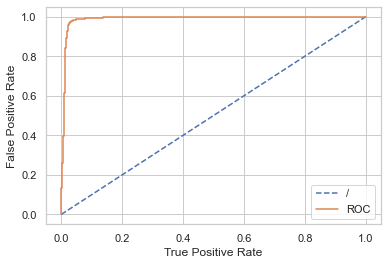

In [102]:
# Compute ROC curve and ROC area for each class
y_pred_proba3 = SVC_im_final.predict_proba(X1_test_im)[::,1]
ns_probs3 = [0 for _ in range(len(y1_test_im))]

#
ns_auc3 = roc_auc_score(y1_test_im, ns_probs3)
lr_auc3 = roc_auc_score(y1_test_im, y_pred_proba3)
ns_fpr3, ns_tpr3, _ = roc_curve(y1_test_im, ns_probs3)
lr_fpr3, lr_tpr3, _ = roc_curve(y1_test_im, y_pred_proba3)

print('AUC=%.3f' % (lr_auc3))

plt.plot(ns_fpr3, ns_tpr3, linestyle='--', label='/')
plt.plot(lr_fpr3, lr_tpr3, label='ROC')

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [78]:
#模型比较
models = pd.DataFrame({
    'Model': [ 'Logistic Regression',  
              'Decision Tree',
              'Random Forest', 
              'Support Vector Machines',],
    'Accuracy': [accuracy_score(y_test_im, y_test_predict_log_im), 
              accuracy_score(y_test_im, y_test_predict_dc_im),  
              accuracy_score(y_test_im, y_test_predict_rf_im),
              accuracy_score(y1_test_im, y1_test_predict_svc_im)],
     'Precision': [precision_score(y_test_im, y_test_predict_log_im), 
              precision_score(y_test_im, y_test_predict_dc_im),  
              precision_score(y_test_im, y_test_predict_rf_im),
              precision_score(y1_test_im, y1_test_predict_svc_im)],
     'Recall': [recall_score(y_test_im, y_test_predict_log_im), 
              recall_score(y_test_im, y_test_predict_dc_im),  
              recall_score(y_test_im, y_test_predict_rf_im),
              recall_score(y1_test_im, y1_test_predict_svc_im)],
     'F1_score': [f1_score(y_test_im, y_test_predict_log_im), 
              f1_score(y_test_im, y_test_predict_dc_im),  
              f1_score(y_test_im, y_test_predict_rf_im),
              f1_score(y1_test_im, y1_test_predict_svc_im)]
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score
2,Random Forest,0.999990,1.000000,0.999883,0.999942
1,Decision Tree,0.999939,0.999883,0.999415,0.999649
0,Logistic Regression,0.938373,0.588017,0.955223,0.727933
3,Support Vector Machines,0.936986,0.581372,0.987254,0.731802


Logit_AUC=0.981 DC_AUC=1.000 RM_AUC=1.000 AVM_AUC=0.990


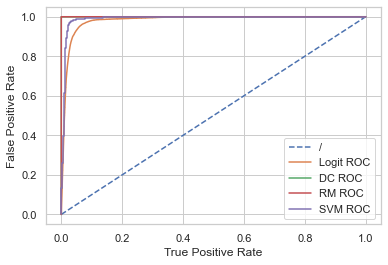

In [82]:
# Compute ROC curve and AUC
y_pred_proba = LOG_im_final.predict_proba(X_test_im)[::,1]
ns_probs = [0 for _ in range(len(y_test_im))]

#
ns_auc = roc_auc_score(y_test_im, ns_probs)
lr_auc = roc_auc_score(y_test_im, y_pred_proba)
ns_fpr, ns_tpr, _ = roc_curve(y_test_im, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_im, y_pred_proba)

print('Logit_AUC=%.3f' % (lr_auc),'DC_AUC=%.3f' % (lr_auc1),'RM_AUC=%.3f' % (lr_auc2),'AVM_AUC=%.3f' % (lr_auc3))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='/')
plt.plot(lr_fpr, lr_tpr, label='Logit ROC')
plt.plot(lr_fpr1, lr_tpr1, label='DC ROC')
plt.plot(lr_fpr2, lr_tpr2, label='RM ROC')
plt.plot(lr_fpr3, lr_tpr3, label='SVM ROC')

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

<AxesSubplot:>

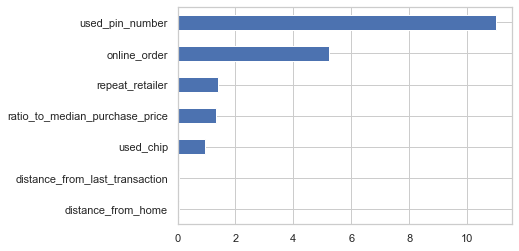

In [107]:
pd.Series(abs(LOG_im_final.coef_[0]),index=X_train_im.columns).sort_values(ascending =True).plot(kind='barh')

In [105]:
print((SVC_im_final))

SVC(C=10, probability=True, random_state=60)
